In [1]:
import sklearn
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

import scipy.io

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt


In [3]:
data = scipy.io.loadmat('olivettifaces.mat')["faces"]

In [4]:
data_train = []
data_valid = []
data_test = []

for i in range(40):
    data_class = []
    for j in range(10):
        data_class.append(data[:, i*10+j])
    
    
    data_class_train, data_class_test = train_test_split(data_class, test_size=0.2)
    
    for item in data_class_train:
        data_train.append(item)
    
    for item in data_class_test:
        data_test.append(item)

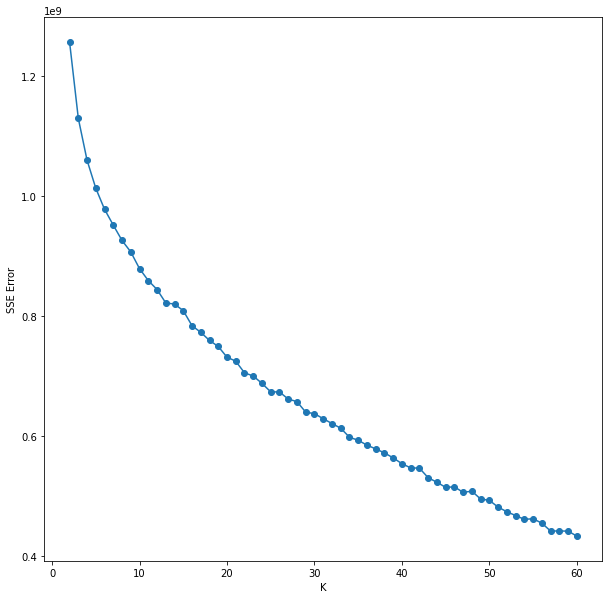

In [6]:
k_list = []
sse_list = []

for k in range(2,61):
    model = KMeans(n_clusters=k, random_state=0).fit(data_train)
    
    k_list.append(k)
    sse_list.append(model.inertia_)
    
plt.scatter(k_list, sse_list)
plt.plot(k_list, sse_list)
plt.xlabel("K")
plt.ylabel("SSE Error")
plt.title("")
plt.gcf().set_size_inches(10, 10)
plt.show()

In [7]:
model = KMeans(n_clusters=14, random_state=0).fit(data_train)

In [9]:
model.cluster_centers_.shape

(14, 4096)

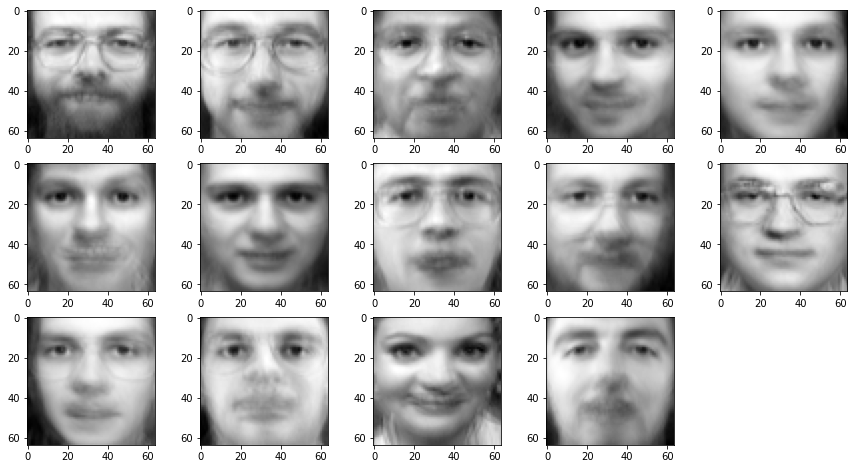

In [22]:
fig, ax = plt.subplots(3,5)
for i in range(3):
    for j in range(5):
        if i==2 and j==4:
            continue
        ax[i][j].imshow(model.cluster_centers_[i*5+j].reshape(64,64).T, cmap="gray")

fig.delaxes(ax[2][4])

fig.set_size_inches(15,8)
plt.show()

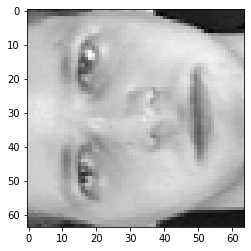